# Test NN on Non-Linear Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mlpnet as mlp

%matplotlib inline

### Define Problem to Solve

In [2]:
# Setup non-linear continuous function

def f(x):
    return (-2.0*x[0]**2 - 2.0*x[0] + 18)*np.exp(-0.5*x[1])

n_in, n_out = (2, 1)

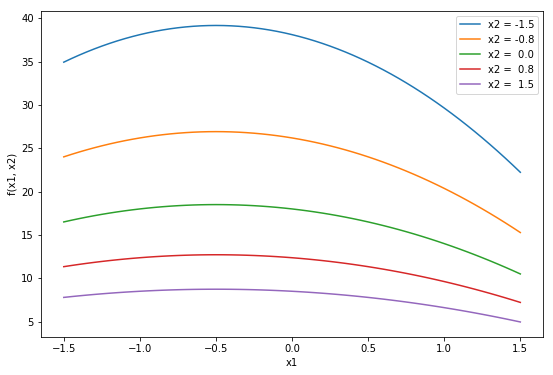

In [3]:
fig, ax = plt.subplots(figsize=(9,6))

nx1, nx2 = (61, 5)
labels = []

x1 = np.linspace(-1.5, 1.5, nx1)
for a in np.linspace(-1.5, 1.5, nx2):
    x2 = np.ones(nx1)*a
    X = np.concatenate((x1.reshape(nx1,1), x2.reshape(nx1,1)), axis=1)
    y = f(X.T)
    ax.plot(x1, y)
    labels.append("x2 = %4.1f" % a)

ax.set_xlabel("x1")
ax.set_ylabel("f(x1, x2)")
ax.legend(labels)

plt.show()

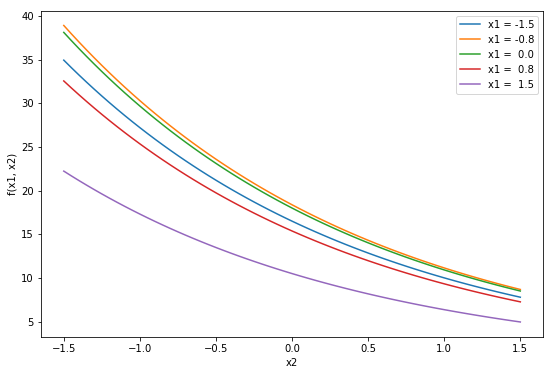

In [4]:
fig, ax = plt.subplots(figsize=(9,6))

nx1, nx2 = (5, 61)
labels = []

x2 = np.linspace(-1.5, 1.5, nx2)
for a in np.linspace(-1.5, 1.5, nx1):
    x1 = np.ones(nx2)*a
    X = np.concatenate((x1.reshape(nx2,1), x2.reshape(nx2,1)), axis=1)
    y = f(X.T)
    ax.plot(x2, y)
    labels.append("x1 = %4.1f" % a)

ax.set_xlabel("x2")
ax.set_ylabel("f(x1, x2)")
ax.legend(labels)

plt.show()

## Generate training data

In [5]:
m = 1000
train_test_split = 0.8

In [6]:
X = np.random.randn(m*n_in).reshape((m, n_in))
X.shape

(1000, 2)

In [7]:
X[0:5]

array([[-0.45034916,  0.21350925],
       [ 0.23503048,  0.15496899],
       [ 0.26034985, -1.0404238 ],
       [ 1.12017806, -0.89740635],
       [-0.52476584, -0.02507083]])

In [8]:
noise_level = 0.1
noise = np.random.randn(m*n_out).reshape((m, n_out))*noise_level
Y = f(X.T).reshape((m,1)) + noise
Y.shape

(1000, 1)

In [9]:
Y[0:5]

array([[ 16.39781191],
       [ 16.11864136],
       [ 29.17404851],
       [ 20.78763615],
       [ 18.69091333]])

In [10]:
Y[0:5].reshape(5,) - f(X.T)[0:5]

array([-0.22456116, -0.00204801, -0.0047777 ,  0.03435819, -0.04120933])

In [11]:
training_data = mlp.MLPTrainingData(inputs=X, outputs=Y)

In [12]:
training_data.split((train_test_split, 1-train_test_split), ("train", "test"))

## Setup NN Model

In [13]:
ndim = [2, 8, 1]
model = mlp.MLPNetwork(ndim, act_funcs=["tanh", "linear"], cost_function="mse")

In [14]:
model.initialize_weights()

In [15]:
train_data, test_data = training_data.subsets[0], training_data.subsets[1]

In [16]:
def costs():
    return (model.cost_function(model, train_data)[0],
            model.cost_function(model, test_data)[0])

In [17]:
initial_costs = costs()
records = {
    "train": [initial_costs[0]],
    "test": [initial_costs[1]]
}
lowest_test_cost = initial_costs[1]

## Training

In [18]:
iterations = 0
batch_size = 100
repeats = 50
epoch_size = batch_size*repeats
saved_weights = None
lambda_param = 0.01

In [19]:
mlp.train(model, train_data, max_iter=1, lambda_param=lambda_param)
model.check_gradients(training_data, lambda_param=0.1)

Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'

Checking backpropagation and gradient calculations...

Comparison of numerical estimate (Left) with analytical (Right)

(0.060528115852775954, 0.060528058237730289)
(-0.00011219469797651982, -0.00011221580389041005)
(-9.0096818894380704e-05, -9.0098110528762375e-05)
(0.01643641667214979, 0.016436392579332045)
(-0.00012434497875801753, -0.00012432116382968885)
(-0.00034333424991928041, -0.0003433666463999737)
(0.017703420951420412, 0.017703379664300467)
(-6.2385652199736796e-05, -6.2415994724255973e-05)
(-0.00010736300737335114, -0.0001073622910255126)
(-0.17300028076761009, -0.17300017517683142)
(6.6080474425689317e-05, 6.6106447589694847e-05)
(0.00015539569631073391, 0.00015542460569698447)
(-0.0039637626514377189, -0.0039637591280990044)
(0.00015049295143398922, 0.00015051771875911057)
(0.00022666313270747196, 0.00022666586333310257)
(0.0075085893058712827, 0.0075086045602404819)
(-2.67164068645797

4.3118080623985124e-07

In [20]:
for i in range(repeats):
    mlp.train(model, train_data, max_iter=batch_size, lambda_param=lambda_param)
    current_costs = costs()
    records["train"].append(current_costs[0])
    records["test"].append(current_costs[1])
    if current_costs[1] < lowest_test_cost:
        saved_weights = (iterations, model.weights.copy())
        lowest_test_cost = current_costs[1]
    iterations += batch_size

Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
Solver returned the following message:
b'STOP: TOTAL N

In [21]:
print("%d iterations complete" % iterations)
print("Lowest test score %f at iteration %d" % (lowest_test_cost, saved_weights[0]))

5000 iterations complete
Lowest test score 0.015107 at iteration 2900


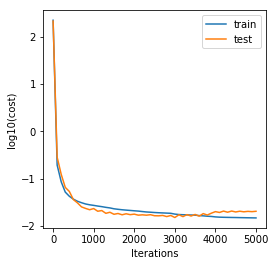

In [22]:
fig, ax = plt.subplots(figsize=(min(12, max(4,iterations//5000)),4))

labels = []

x = np.arange(0, iterations+1, batch_size)
for key, values in records.items():
    y = np.array(values)
    ax.plot(x, np.log10(y))
    labels.append(key)

ax.set_xlabel("Iterations")
ax.set_ylabel("log10(cost)")
ax.legend(labels)

plt.show()

In [23]:
model.set_weights(saved_weights[1])

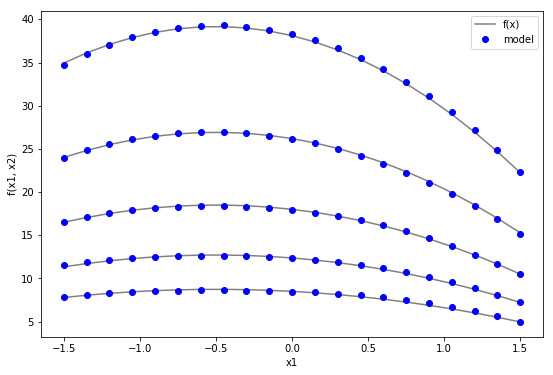

In [24]:
fig, ax = plt.subplots(figsize=(9,6))

nx1, nx2 = (21, 5)
labels = []

x1 = np.linspace(-1.5, 1.5, nx1)
for a in np.linspace(-1.5, 1.5, nx2):
    x2 = np.ones(nx1)*a
    X = np.concatenate((x1.reshape(nx1,1), x2.reshape(nx1,1)), axis=1)
    y = f(X.T)
    y2 = model.predict(X)
    ax.plot(x1, y, "grey")
    ax.plot(x1, y2, "bo")

ax.set_xlabel("x1")
ax.set_ylabel("f(x1, x2)")
ax.legend(["f(x)", "model"])

plt.show()

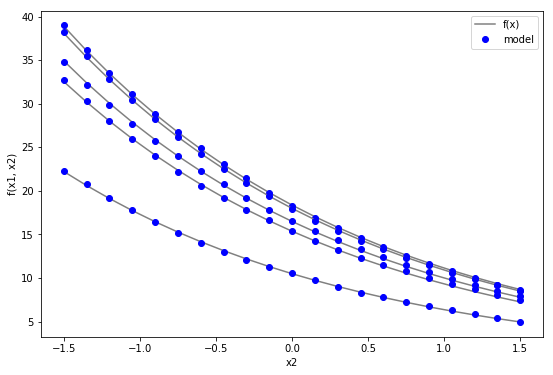

In [25]:
fig, ax = plt.subplots(figsize=(9,6))

nx1, nx2 = (5, 21)

x2 = np.linspace(-1.5, 1.5, nx2)
for a in np.linspace(-1.5, 1.5, nx1):
    x1 = np.ones(nx2)*a
    X = np.concatenate((x1.reshape(nx2,1), x2.reshape(nx2,1)), axis=1)
    y = f(X.T)
    y2 = model.predict(X)
    ax.plot(x2, y, "grey")
    ax.plot(x2, y2, "bo")

ax.set_xlabel("x2")
ax.set_ylabel("f(x1, x2)")
ax.legend(["f(x)", "model"])

plt.show()